# Part II - San Francisco Bike Sharing Presentation
## by Zoë Walp 

## Investigation Overview

The dataset under examination provides insights into bike share rental trends in San Francisco during 2018. It encompasses several key variables, including age, membership type, gender, rider duration, and the geographical coordinates of both the starting and ending points for rideshare journeys within San Francisco.


## Dataset Overview and Executive Summary

The analysis reveals several noteworthy findings:

* A notable gender disparity exists among bike riders, with a higher prevalence of male riders compared to female riders.
* Bike sharing caters to a wide demographic range, as both younger and older individuals actively participate in bike rentals.
* The duration of bike rides exhibits significant variability, with trips ranging from brief journeys of a few minutes to extended rides lasting several hours.
* The dataset reflects the convenience and accessibility of bike sharing, as riders initiate and conclude their journeys at diverse locations throughout the city.
* Membership type is a significant determinant of usage, with ride share subscribers demonstrating higher utilization rates in comparison to ride share customers, highlighting the service's appeal to its regular users.

These findings shed light on the diverse nature of bike sharing in San Francisco, emphasizing its inclusive and flexible nature, which caters to a broad spectrum of riders across the city.

In [1]:
#packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_bike_clean=pd.read_csv('bike_clean.csv')
df_bike_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,biker_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.750000,39.0
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030.900000,51.0
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608.166667,34.0
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26.416667,49.0
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,29.883333,64.0


## What times of day are people more likely to ride bikes based on start time? How does this vary among genders?

This **clustered bar chart** visualization (see below) looks at the times of day that people tend to ride their bikes. It looks at differences among genders as well.

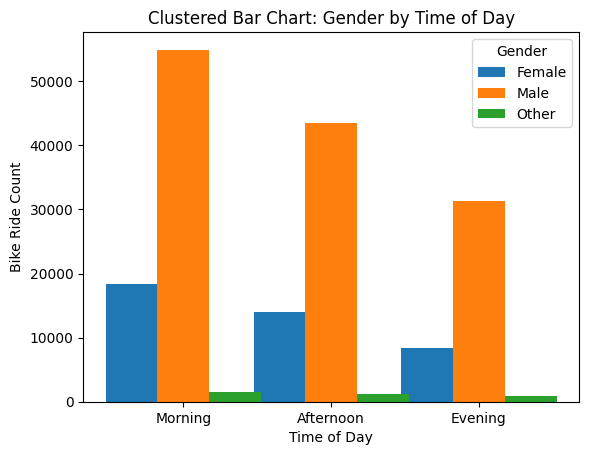

In [3]:
##CLUSTERED BAR CHART##
# # Define time intervals
time_frames = [0, 12, 17, 24]
time_labels = ['Morning', 'Afternoon', 'Evening']

# # Convert 'start_time' to datetime
df_bike_clean['start_time'] = pd.to_datetime(df_bike_clean['start_time'])
# # Extract hour from 'start_time' to create the 'time_of_day' column
df_bike_clean['hour'] = df_bike_clean['start_time'].dt.hour
df_bike_clean['time_of_day'] = pd.cut(df_bike_clean['hour'], bins=time_frames, labels=time_labels)
# Create a pivot table to count occurrences
grouped_data = df_bike_clean.pivot_table(index='time_of_day', columns='member_gender', aggfunc='size', fill_value=0)
# Figure and axes
fig, ax = plt.subplots()
#Bar speculations
bar_width = 0.35
x = range(len(grouped_data))
# Create bars for each gender within each time of day using loop
for i, gender in enumerate(grouped_data.columns):
    ax.bar(x, grouped_data[gender], bar_width, label=gender)
    x = [pos + bar_width for pos in x]
# Set labels
ax.set_xticks([pos + bar_width for pos in range(len(grouped_data))])
ax.set_xticklabels(grouped_data.index)
ax.set_xlabel('Time of Day')
ax.set_ylabel('Bike Ride Count')
ax.set_title('Clustered Bar Chart: Gender by Time of Day')
#Plot
plt.legend(title='Gender')
plt.show()

This bar chart clearly illustrates a significant male ridership, especially during the morning hours. In the morning, nearly 6,000 males took bike rides, whereas the number of female riders was just below 2,000.

During the afternoon, the number of male riders decreased to slightly under 5,000, and a similar number of females also took rides, reaching just under 2,000.

In the evening, ridership for both genders decreased further, with approximately 3,500 males and a little over 1,000 females riding. The count for the 'other' gender category remained fairly consistent across morning, afternoon, and evening.

Overall, the chart highlights a significant disparity in the number of male and female riders, with the highest male ridership observed in the morning and a more balanced distribution during the afternoon. The 'other' gender category maintained a relatively stable ridership count throughout the day.

## What is the distribution of start and stop points within San Francisco?
This **heatmap** visualization (see below) looks at the popularity among start and end stations for riders. The darker the square the more users either pick up or drop off their bikes from there.


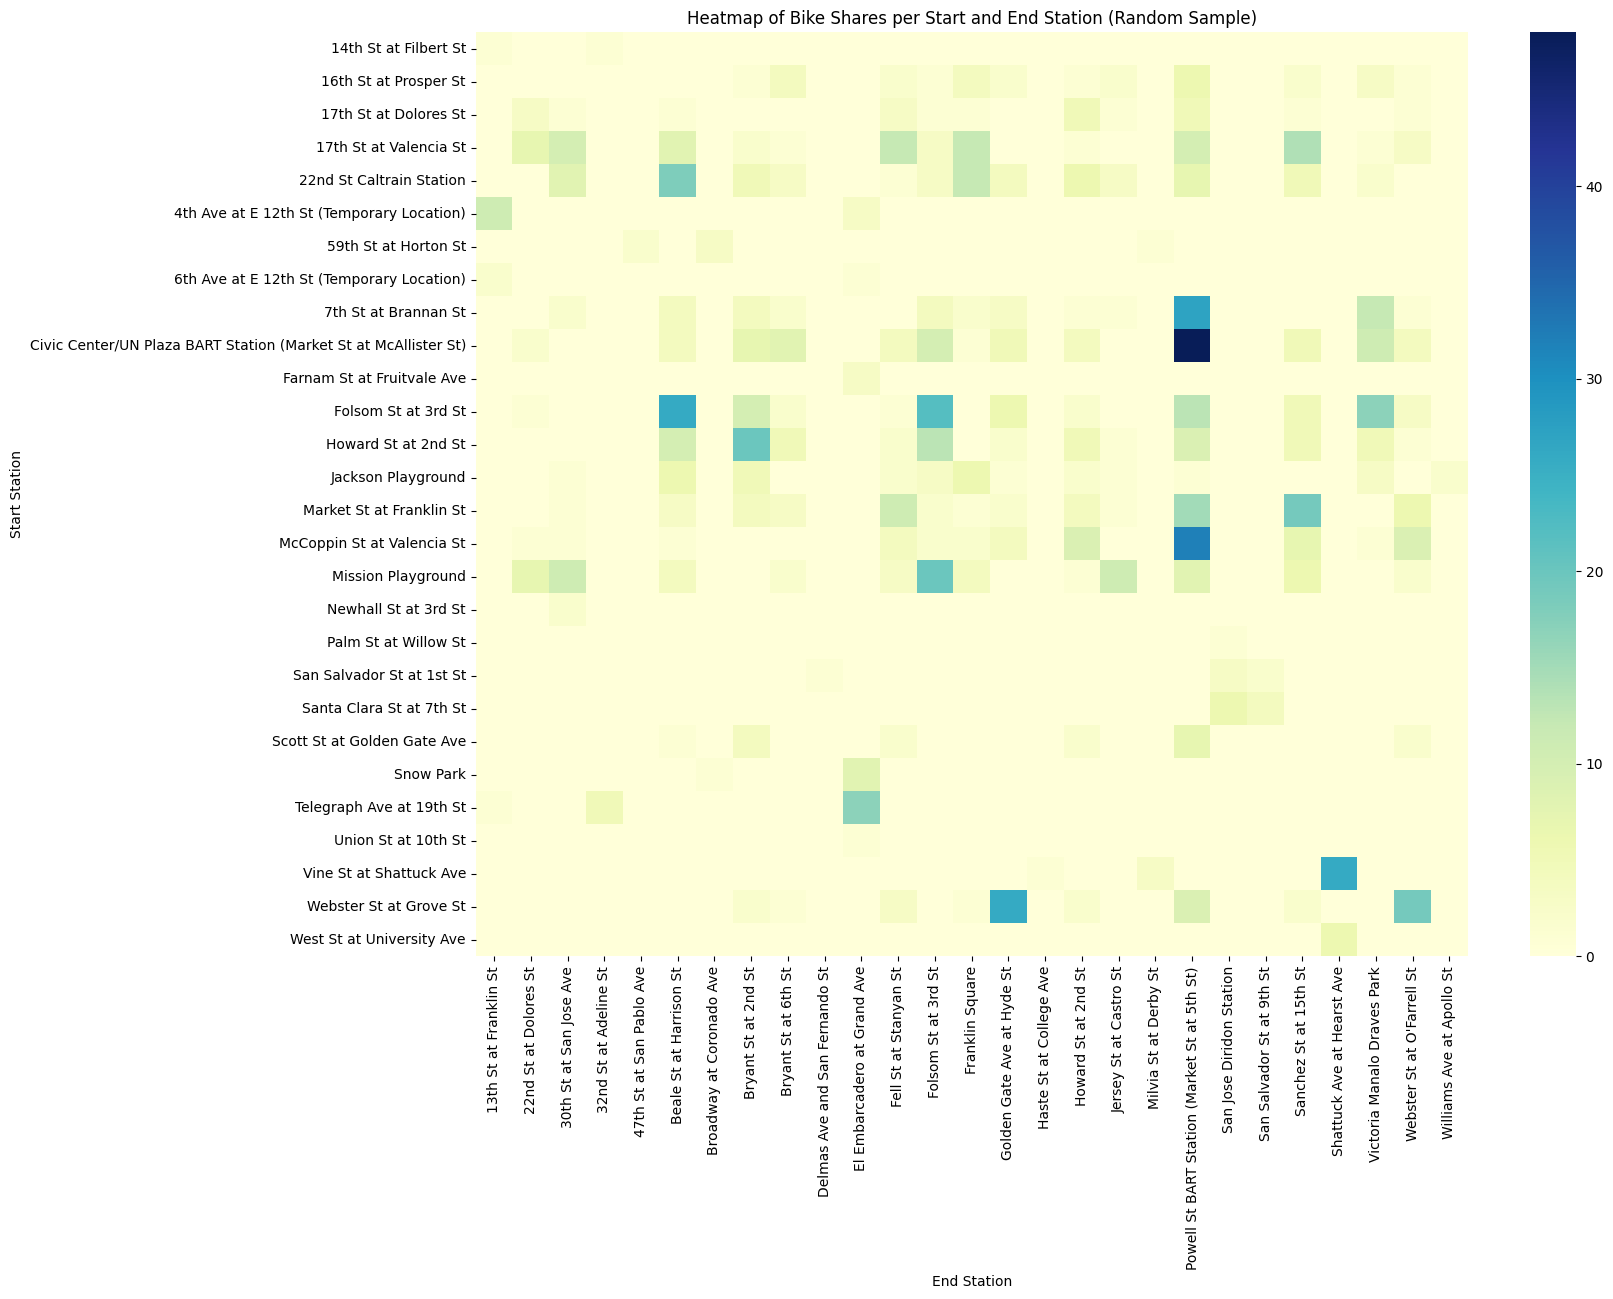

In [ ]:
##HEATMAP##
def plot_heatmap_random(dataframe, num_samples):
    # Randomly sample the start stations
    random_start_stations = pd.Series(dataframe['start_station_name'].unique()).sample(num_samples, random_state=42)

    # Randomly sample the stop stations
    random_stop_stations = pd.Series(dataframe['end_station_name'].unique()).sample(num_samples, random_state=42)

    # Filter the DataFrame to include only rows with start and stop stations in sample of 30 
    filtered_df = dataframe[dataframe['start_station_name'].isin(random_start_stations) & dataframe['end_station_name'].isin(random_stop_stations)]

    # Create a pivot table with filtered data
    pivot_data = filtered_df.pivot_table(index='start_station_name', columns='end_station_name', values='bike_id', aggfunc='count', fill_value=0)

    # Plot heatmap
    plt.figure(figsize=(16, 12))
    sns.heatmap(pivot_data, cmap='YlGnBu', annot=False, annot_kws={"size": 10})
    plt.title('Heatmap of Bike Shares per Start and End Station (Random Sample)')
    plt.xlabel('End Station')
    plt.ylabel('Start Station')
    plt.show()

# Usage
num_samples = 30
plot_heatmap_random(df_bike_clean, num_samples)

This dataset is quite extensive, so we've taken a random sample of start and stop stations to provide a manageable overview. From this sample, it's evident that BART stations and major intersections tend to have a higher frequency of bike start and stop events. For instance, Powell St BART station is a popular drop-off location for bicyclists, while Plaza BART Station sees a significant number of bicycle pickups. In contrast, stations like West St at University Ave and Haste St at College Ave experience less bike traffic.

It's important to note that this sample represents just 30 stations out of over 300 in the dataset, so it may not fully reflect the true popularity of bike share stations.

## How does the distribution of rides vary between various user types?
This **facet plot** visualization (see below) looks at the number of bikerides taken per subscriber vs customer.


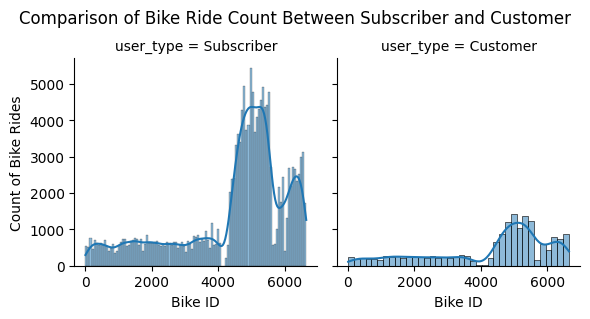

In [5]:
##FACET PLOT##
def facet_comparison(dataframe):
    ride_count = dataframe['bike_id'].value_counts().reset_index()
    ride_count.columns = ['bike_id', 'ride_count']
    
    g = sns.FacetGrid(data=dataframe, col='user_type', col_order=['Subscriber', 'Customer'])
    g.map(sns.histplot, 'bike_id', kde=True)
    g.set_axis_labels('Bike ID', 'Count of Bike Rides')
    g.fig.suptitle('Comparison of Bike Ride Count Between Subscriber and Customer', size=12, y=1.05)
    plt.show()

# Usage
facet_comparison(df_bike_clean)

The data indicates a significantly higher number of subscribers compared to customers. Subscribers tend to have a substantially greater number of rides, with the highest recorded ride count for customers being approximately 1500, whereas some subscribers have more than 4000 rides on record per biker.